In [1]:
#Time series practice

In [1]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [29]:
ts_data=pd.read_csv('time_series_data.csv',names=['date','count'],index_col='date',parse_dates=True)
#We can use ts_data.index=pd.to_datetime(ts_data.index,format='%y-%m-%d') as well

In [30]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2019-01-06 to 2019-04-21
Data columns (total 1 columns):
count    16 non-null int64
dtypes: int64(1)
memory usage: 256.0 bytes


In [31]:
ts_data

,count
date,
2019-01-06,10
2019-01-13,10
2019-01-20,13
2019-01-27,12
2019-02-03,25
2019-02-10,35
2019-02-17,18
2019-02-24,22
2019-03-03,14


In [32]:
ts_data['2019-01']

,count
date,
2019-01-06,10
2019-01-13,10
2019-01-20,13
2019-01-27,12


In [33]:
ts_data['count'].asfreq('W')

date
2019-01-06    10
2019-01-13    10
2019-01-20    13
2019-01-27    12
2019-02-03    25
2019-02-10    35
2019-02-17    18
2019-02-24    22
2019-03-03    14
2019-03-10    29
2019-03-17    44
2019-03-24    12
2019-03-31    16
2019-04-07     6
2019-04-14    19
2019-04-21    33
Freq: W-SUN, Name: count, dtype: int64

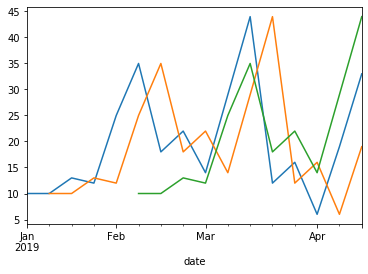

In [34]:
ts_data['count'].asfreq('W').plot()
ts_data['count'].asfreq('W').shift().plot()
ts_data['count'].asfreq('W').shift(5).plot()

In [101]:
#upsampling (low frew to high) and down sampling(high freq to low)

In [36]:
ts_data['count'].resample('D').pad()

date
2019-01-06    10
2019-01-07    10
2019-01-08    10
2019-01-09    10
2019-01-10    10
              ..
2019-04-17    19
2019-04-18    19
2019-04-19    19
2019-04-20    19
2019-04-21    33
Freq: D, Name: count, Length: 106, dtype: int64

In [37]:
ts_data

,count
date,
2019-01-06,10
2019-01-13,10
2019-01-20,13
2019-01-27,12
2019-02-03,25
2019-02-10,35
2019-02-17,18
2019-02-24,22
2019-03-03,14


In [41]:
ts_data['count'].resample('M').mean()

date
2019-01-31    11.250000
2019-02-28    25.000000
2019-03-31    23.000000
2019-04-30    19.333333
Freq: M, Name: count, dtype: float64

In [39]:
ts_data['count'].resample('M',label='left').mean()

date
2018-12-31    11.250000
2019-01-31    25.000000
2019-02-28    23.000000
2019-03-31    19.333333
Freq: M, Name: count, dtype: float64

In [42]:
ts_data['count'].resample('M',closed='left').mean()

date
2019-01-31    11.25
2019-02-28    25.00
2019-03-31    24.75
2019-04-30    18.50
Freq: M, Name: count, dtype: float64

In [107]:
#Window functions (Rolling and expanding)

In [ ]:
#Rolling

In [43]:
ts_data

,count
date,
2019-01-06,10
2019-01-13,10
2019-01-20,13
2019-01-27,12
2019-02-03,25
2019-02-10,35
2019-02-17,18
2019-02-24,22
2019-03-03,14


In [44]:
ts_data['count'].rolling(15).mean() 
#15 is a window size. that is number of observations(fixed) required to claculate statistic
#min_period = window size that is 15. 15 observations is required to have a value otherwise result is NA

date
2019-01-06          NaN
2019-01-13          NaN
2019-01-20          NaN
2019-01-27          NaN
2019-02-03          NaN
2019-02-10          NaN
2019-02-17          NaN
2019-02-24          NaN
2019-03-03          NaN
2019-03-10          NaN
2019-03-17          NaN
2019-03-24          NaN
2019-03-31          NaN
2019-04-07          NaN
2019-04-14    19.000000
2019-04-21    20.533333
Name: count, dtype: float64

In [45]:
ts_data['count'].rolling('15D').mean()
#15d is window offset. each window is now variable sized based on number of observation included as 
#min_period is now default to 1. That is minimum one observation is enf to calculate result statistic

date
2019-01-06    10.000000
2019-01-13    10.000000
2019-01-20    11.000000
2019-01-27    11.666667
2019-02-03    16.666667
2019-02-10    24.000000
2019-02-17    26.000000
2019-02-24    25.000000
2019-03-03    18.000000
2019-03-10    21.666667
2019-03-17    29.000000
2019-03-24    28.333333
2019-03-31    24.000000
2019-04-07    11.333333
2019-04-14    13.666667
2019-04-21    19.333333
Name: count, dtype: float64

In [46]:
#Auto correlation

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [50]:
np.corrcoef(ts_data['count'][2:],ts_data['count'][:-2])

array([[ 1.        , -0.20912149],
       [-0.20912149,  1.        ]])

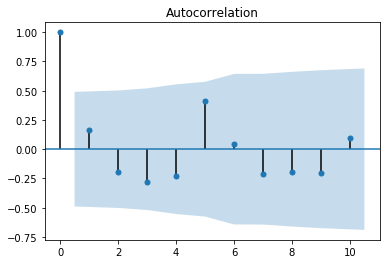

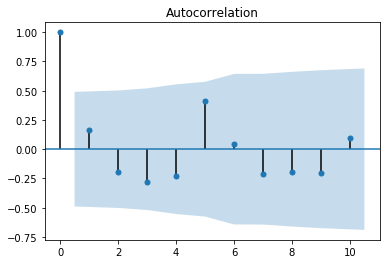

In [51]:
plot_acf(ts_data['count'],lags=10)

In [98]:
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})

In [71]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [72]:
df.iloc[1,1]=np.nan

In [73]:
df

,A,B,C
0,a,1.0,2
1,b,NaN,4
2,c,5.0,6


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
A    3 non-null object
B    2 non-null float64
C    3 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.0+ bytes


In [75]:
df.iloc[1,1]=3

In [76]:
df

,A,B,C
0,a,1.0,2
1,b,3.0,4
2,c,5.0,6


In [99]:
df['D']=[0,0,0]

In [100]:
df

,A,B,C,D
0,a,1,2,0
1,b,3,4,0
2,c,5,6,0


In [102]:
pd.melt(df, id_vars=['A'], value_vars=['B','C','D'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6
6,a,D,0
7,b,D,0
8,c,D,0


In [103]:
df.unstack()

A  0    a
   1    b
   2    c
B  0    1
   1    3
   2    5
C  0    2
   1    4
   2    6
D  0    0
   1    0
   2    0
dtype: object

In [104]:
import pandas as pd
import numpy as np
df_nan = pd.DataFrame({'Country': ['Russia','Colombia',np.nan,'Equador','Nigeria','India','Bangla','japan','london','italy'],
                    'Rank':[121,40,100,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,59]})

In [105]:
df_nan

,Country,Rank
0,Russia,121.0
1,Colombia,40.0
2,NaN,100.0
3,Equador,NaN
4,Nigeria,NaN
5,India,NaN
6,Bangla,NaN
7,japan,NaN
8,london,NaN
9,italy,59.0


In [106]:
df_nan.dtypes

Country     object
Rank       float64
dtype: object

In [107]:
df_nan['NEW']=df_nan['Rank'].astype('category')

In [108]:
df_nan.dtypes

Country      object
Rank        float64
NEW        category
dtype: object

In [109]:
df_nan

,Country,Rank,NEW
0,Russia,121.0,121.0
1,Colombia,40.0,40.0
2,NaN,100.0,100.0
3,Equador,NaN,NaN
4,Nigeria,NaN,NaN
5,India,NaN,NaN
6,Bangla,NaN,NaN
7,japan,NaN,NaN
8,london,NaN,NaN
9,italy,59.0,59.0


In [110]:
df_nan.Rank.fillna(method='bfill',limit=7)

0    121.0
1     40.0
2    100.0
3     59.0
4     59.0
5     59.0
6     59.0
7     59.0
8     59.0
9     59.0
Name: Rank, dtype: float64

In [111]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria','India','Bangla'],
                    'Rank':[121,40,100,130,11,40,40],
                    'unknown':[22,11,22,33,44,55,66]})

In [112]:
df

,Country,Rank,unknown
0,Russia,121,22
1,Colombia,40,11
2,Chile,100,22
3,Equador,130,33
4,Nigeria,11,44
5,India,40,55
6,Bangla,40,66


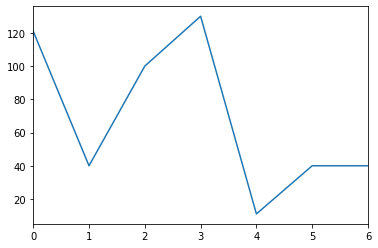

In [137]:
df.Rank.plot()

In [114]:
df_unstacked=df.unstack()

In [115]:
df_unstacked

Country  0      Russia
         1    Colombia
         2       Chile
         3     Equador
         4     Nigeria
         5       India
         6      Bangla
Rank     0         121
         1          40
         2         100
         3         130
         4          11
         5          40
         6          40
unknown  0          22
         1          11
         2          22
         3          33
         4          44
         5          55
         6          66
dtype: object

In [116]:
type(df_unstacked)

pandas.core.series.Series

In [138]:
df.unstack(level=0)

Country  0      Russia
         1    Colombia
         2       Chile
         3     Equador
         4     Nigeria
         5       India
         6      Bangla
Rank     0         121
         1          40
         2         100
         3         130
         4          11
         5          40
         6          40
unknown  0          22
         1          11
         2          22
         3          33
         4          44
         5          55
         6          66
dtype: object

In [117]:
df_unstacked.unstack(level=0)

,Country,Rank,unknown
0,Russia,121,22
1,Colombia,40,11
2,Chile,100,22
3,Equador,130,33
4,Nigeria,11,44
5,India,40,55
6,Bangla,40,66


In [118]:
df_unstacked.unstack(level=1)

,0,1,2,3,4,5,6
Country,Russia,Colombia,Chile,Equador,Nigeria,India,Bangla
Rank,121,40,100,130,11,40,40
unknown,22,11,22,33,44,55,66


In [119]:
df_unstacked.unstack(level=-1)

,0,1,2,3,4,5,6
Country,Russia,Colombia,Chile,Equador,Nigeria,India,Bangla
Rank,121,40,100,130,11,40,40
unknown,22,11,22,33,44,55,66


In [120]:
df1 = pd.DataFrame({'Country': ['AAAA','BBBBB','CCCC','DDDD','EEEE','FFFF','GGGGG'],
                    'Rank':[123,41,101,130,12,41,41]})

In [121]:
df1_unstacked=df1.unstack()

In [122]:
df1_unstacked

Country  0     AAAA
         1    BBBBB
         2     CCCC
         3     DDDD
         4     EEEE
         5     FFFF
         6    GGGGG
Rank     0      123
         1       41
         2      101
         3      130
         4       12
         5       41
         6       41
dtype: object

In [123]:
df_unstacked

Country  0      Russia
         1    Colombia
         2       Chile
         3     Equador
         4     Nigeria
         5       India
         6      Bangla
Rank     0         121
         1          40
         2         100
         3         130
         4          11
         5          40
         6          40
unknown  0          22
         1          11
         2          22
         3          33
         4          44
         5          55
         6          66
dtype: object

In [124]:
new_df=pd.concat([df_unstacked,df1_unstacked],axis=1)

In [125]:
new_df

0      1
Country 0    Russia   AAAA
        1  Colombia  BBBBB
        2     Chile   CCCC
        3   Equador   DDDD
        4   Nigeria   EEEE
        5     India   FFFF
        6    Bangla  GGGGG
Rank    0       121    123
        1        40     41
        2       100    101
        3       130    130
        4        11     12
        5        40     41
        6        40     41
unknown 0        22    NaN
        1        11    NaN
        2        22    NaN
        3        33    NaN
        4        44    NaN
        5        55    NaN
        6        66    NaN

In [126]:
type(new_df)

pandas.core.frame.DataFrame

In [129]:
new_df.reset_index(inplace=True)

In [130]:
new_df

,index,level_0,level_1,0,1
0,0,Country,0,Russia,AAAA
1,1,Country,1,Colombia,BBBBB
2,2,Country,2,Chile,CCCC
3,3,Country,3,Equador,DDDD
4,4,Country,4,Nigeria,EEEE
5,5,Country,5,India,FFFF
6,6,Country,6,Bangla,GGGGG
7,7,Rank,0,121,123
8,8,Rank,1,40,41
9,9,Rank,2,100,101


In [184]:
df

,Country,Rank,unknown,C
0,Russia,121,22,1
1,Colombia,40,11,2
2,Chile,100,22,3
3,Equador,130,33,4
4,Nigeria,11,44,5
5,India,40,55,6
6,Bangla,40,66,7


In [185]:
df1

,Country,Rank
0,AAAA,123
1,BBBBB,41
2,CCCC,101
3,DDDD,130
4,EEEE,12
5,FFFF,41
6,GGGGG,41


In [186]:
df_new=pd.concat([df,df1],axis=1)

In [187]:
df_new['Country']

,Country,Country
0,Russia,AAAA
1,Colombia,BBBBB
2,Chile,CCCC
3,Equador,DDDD
4,Nigeria,EEEE
5,India,FFFF
6,Bangla,GGGGG


In [35]:
df_new.columns

Index(['Country', 'Rank', 'Country', 'Rank'], dtype='object')

In [ ]:
df1

In [58]:
df.merge(df1,on='Rank',how='left')

,Country_x,Rank,Country_y
0,Russia,121,NaN
1,Colombia,40,NaN
2,Chile,100,NaN
3,Equador,130,DDDD
4,Nigeria,11,NaN
5,India,40,NaN
6,Bangla,40,NaN


In [183]:
df.join(df1,on='Rank',how='left',lsuffix='xxx')

,Countryxxx,Rankxxx,unknown,C,Country,Rank
0,Russia,121,22,1,NaN,NaN
1,Colombia,40,11,2,NaN,NaN
2,Chile,100,22,3,NaN,NaN
3,Equador,130,33,4,NaN,NaN
4,Nigeria,11,44,5,NaN,NaN
5,India,40,55,6,NaN,NaN
6,Bangla,40,66,7,NaN,NaN


In [180]:
df.merge(df1,on='Rank',how='right')

,Country_x,Rank,unknown,C,Country_y
0,Equador,130,33.0,4,DDDD
1,NaN,123,NaN,NaN,AAAA
2,NaN,41,NaN,NaN,BBBBB
3,NaN,41,NaN,NaN,FFFF
4,NaN,41,NaN,NaN,GGGGG
5,NaN,101,NaN,NaN,CCCC
6,NaN,12,NaN,NaN,EEEE


In [181]:
df.merge(df1,on='Rank',how='outer')

,Country_x,Rank,unknown,C,Country_y
0,Russia,121,22.0,1,NaN
1,Colombia,40,11.0,2,NaN
2,India,40,55.0,6,NaN
3,Bangla,40,66.0,7,NaN
4,Chile,100,22.0,3,NaN
5,Equador,130,33.0,4,DDDD
6,Nigeria,11,44.0,5,NaN
7,NaN,123,NaN,NaN,AAAA
8,NaN,41,NaN,NaN,BBBBB
9,NaN,41,NaN,NaN,FFFF


In [12]:
type(df.Country)

pandas.core.series.Series

In [188]:
df

,Country,Rank,unknown,C
0,Russia,121,22,1
1,Colombia,40,11,2
2,Chile,100,22,3
3,Equador,130,33,4
4,Nigeria,11,44,5
5,India,40,55,6
6,Bangla,40,66,7


In [143]:
df.loc[~df['Rank'].isnull(),'Country']

0      Russia
1    Colombia
2       Chile
3     Equador
4     Nigeria
5       India
6      Bangla
Name: Country, dtype: object

In [13]:
df['Country'][df.Rank > 100]

0     Russia
3    Equador
Name: Country, dtype: object

In [189]:
df.loc[df.Rank>100,'Country']
#df[df.Rank>100,'Country']   ---------> Will not work

0     Russia
3    Equador
Name: Country, dtype: object

In [190]:
np.where(df.Rank > 100)

(array([0, 3], dtype=int64),)

In [153]:
np.where(df['Rank'] > 100)

(array([0, 3], dtype=int64),)

In [150]:
df.loc[np.where(df.Rank > 100)]

,Country,Rank,unknown
0,Russia,121,22
3,Equador,130,33


In [156]:
#!pip install pandas-profiling

In [157]:
import pandas_profiling as pp

In [162]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Pandas Profiling Report.html")

In [163]:
df.dtypes

Country    object
Rank        int64
unknown     int64
dtype: object

In [165]:
df._get_numeric_data()

,Rank,unknown
0,121,22
1,40,11
2,100,22
3,130,33
4,11,44
5,40,55
6,40,66


In [166]:
df.select_dtypes(exclude=['int64', 'float'])

,Country
0,Russia
1,Colombia
2,Chile
3,Equador
4,Nigeria
5,India
6,Bangla


In [167]:
df2=df

In [168]:
df2

,Country,Rank,unknown
0,Russia,121,22
1,Colombia,40,11
2,Chile,100,22
3,Equador,130,33
4,Nigeria,11,44
5,India,40,55
6,Bangla,40,66


In [170]:
df2.values  #-> returns numpy representation of the dataframe

array([['Russia', 121, 22],
       ['Colombia', 40, 11],
       ['Chile', 100, 22],
       ['Equador', 130, 33],
       ['Nigeria', 11, 44],
       ['India', 40, 55],
       ['Bangla', 40, 66]], dtype=object)

In [171]:
df2.iloc[4].values[:-1]

array(['Nigeria', 11], dtype=object)

In [172]:
df['C']=['1','2','3','4','5','6','7']

In [173]:
df2

,Country,Rank,unknown,C
0,Russia,121,22,1
1,Colombia,40,11,2
2,Chile,100,22,3
3,Equador,130,33,4
4,Nigeria,11,44,5
5,India,40,55,6
6,Bangla,40,66,7


In [177]:
df

,Country,Rank,unknown,C
0,Russia,121,22,1
1,Colombia,40,11,2
2,Chile,100,22,3
3,Equador,130,33,4
4,Nigeria,11,44,5
5,India,40,55,6
6,Bangla,40,66,7


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Country    7 non-null object
Rank       7 non-null int64
unknown    7 non-null int64
C          7 non-null object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [21]:
df[df['Rank']>120]

,Country,Rank,C
0,Russia,121,1
3,Equador,130,4


In [20]:
display(df[df['Rank']>120])

,Country,Rank,C
0,Russia,121,1
3,Equador,130,4


In [174]:
df.keys()

Index(['Country', 'Rank', 'unknown', 'C'], dtype='object')

In [175]:
df.columns

Index(['Country', 'Rank', 'unknown', 'C'], dtype='object')

In [176]:
df['C'].loc[1]

'2'

In [11]:
df.dtypes

Country    object
Rank        int64
C          object
dtype: object

In [15]:
df['C'].astype(float).mean()

4.0

In [33]:
df.shape

(7, 2)

In [34]:
df['Rank'].shape

(7,)

In [26]:
df[['Country','Rank']]

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11
5,India,40
6,Bangla,40


In [121]:
df.Country

0      Russia
1    Colombia
2       Chile
3     Equador
4     Nigeria
5       India
6      Bangla
Name: Country, dtype: object

In [122]:
df.Rank

0    121
1     40
2    100
3    130
4     11
5     40
6     40
Name: Rank, dtype: int64

In [3]:
df.columns

Index(['Country', 'Rank', 'A'], dtype='object')

In [191]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [192]:
df.values

array([['Russia', 121, 22, '1'],
       ['Colombia', 40, 11, '2'],
       ['Chile', 100, 22, '3'],
       ['Equador', 130, 33, '4'],
       ['Nigeria', 11, 44, '5'],
       ['India', 40, 55, '6'],
       ['Bangla', 40, 66, '7']], dtype=object)

In [193]:
df['Country'].dtype
df['Rank'].dtype

dtype('int64')

In [194]:
df['Country'].values

array(['Russia', 'Colombia', 'Chile', 'Equador', 'Nigeria', 'India',
       'Bangla'], dtype=object)

In [197]:
df.loc[0]

Country    Russia
Rank          121
unknown        22
C               1
Name: 0, dtype: object

In [198]:
df.loc[0:2,'Rank']

0    121
1     40
2    100
Name: Rank, dtype: int64

In [199]:
df.loc[0,'Country']

'Russia'

In [200]:
df.loc[0]['Country']

'Russia'

In [202]:
df[0:2]

,Country,Rank,unknown,C
0,Russia,121,22,1
1,Colombia,40,11,2


In [38]:
df['Country'][0]
#df[0]['Country']   #Key error
df[0:2]['Country']

0      Russia
1    Colombia
Name: Country, dtype: object

In [206]:
#df['Country',0]    #key error
#df[0]  #key error  
#df[0,1] #key error
#df[0:1,'Country']  #invalid key
df[0:1]  #works!!
df.iloc[:,:2]

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11
5,India,40
6,Bangla,40


In [208]:
df['A']=[5,10,15,20,25,23,88]

In [209]:
df

,Country,Rank,unknown,C,A
0,Russia,121,22,1,5
1,Colombia,40,11,2,10
2,Chile,100,22,3,15
3,Equador,130,33,4,20
4,Nigeria,11,44,5,25
5,India,40,55,6,23
6,Bangla,40,66,7,88


In [210]:
df[['Country','A']]

,Country,A
0,Russia,5
1,Colombia,10
2,Chile,15
3,Equador,20
4,Nigeria,25
5,India,23
6,Bangla,88


In [211]:
df.Country

0      Russia
1    Colombia
2       Chile
3     Equador
4     Nigeria
5       India
6      Bangla
Name: Country, dtype: object

In [212]:
df = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria'],
                    'Rank':[121,40,100,130,11]},index=['a1','a2','a3','a4','a5'])
df

,Country,Rank
a1,Russia,121
a2,Colombia,40
a3,Chile,100
a4,Equador,130
a5,Nigeria,11


In [213]:
df.iloc[0]

Country    Russia
Rank          121
Name: a1, dtype: object

In [ ]:
#df.iloc[0,'Country'] iloc can only take integers or iteger slice, list of ints or boolean array

In [214]:
df.iloc[1,1]

40

In [215]:
df['Country'].unique()

array(['Russia', 'Colombia', 'Chile', 'Equador', 'Nigeria'], dtype=object)

In [216]:
df[df['Rank']>100]


,Country,Rank
a1,Russia,121
a4,Equador,130


In [217]:
df['Rank'] > 100

a1     True
a2    False
a3    False
a4     True
a5    False
Name: Rank, dtype: bool

In [10]:
df2=df

In [13]:
df2[df2['Country'].isin(['Chile','Nigeria'])]
df2['Country'].isin(['Chile','Nigeria'])

0    False
1    False
2     True
3    False
4     True
Name: Country, dtype: bool

In [218]:
df2[~df2['Country'].isin(['Chile','Nigeria'])]

,Country,Rank,unknown,C,A
0,Russia,121,22,1,5
1,Colombia,40,11,2,10
3,Equador,130,33,4,20
5,India,40,55,6,23
6,Bangla,40,66,7,88


In [219]:
df2[-df2['Country'].isin(['Chile','Nigeria'])]

,Country,Rank,unknown,C,A
0,Russia,121,22,1,5
1,Colombia,40,11,2,10
3,Equador,130,33,4,20
5,India,40,55,6,23
6,Bangla,40,66,7,88


In [224]:
df2

,Country,Rank,unknown,C,A,c
0,Russia,121,22,1,5,2
1,Colombia,40,11,2,10,6
2,Chile,100,22,3,15,8
3,Equador,130,33,4,20,2
4,Nigeria,11,44,5,25,1
5,India,40,55,6,23,8
6,Bangla,40,66,7,88,8


In [226]:
df3=df2
df3['c']=[2,6,8,2,1,2,2]
df3['d']=[12,3,9,10,2,2,1]
df3

,Country,Rank,unknown,C,A,c,d
0,Russia,121,22,1,5,2,12
1,Colombia,40,11,2,10,6,3
2,Chile,100,22,3,15,8,9
3,Equador,130,33,4,20,2,10
4,Nigeria,11,44,5,25,1,2
5,India,40,55,6,23,2,2
6,Bangla,40,66,7,88,2,1


In [227]:
#df3['c'>'d']   #Error
df3['d']
df3.query('c>d')

,Country,Rank,unknown,C,A,c,d
1,Colombia,40,11,2,10,6,3
6,Bangla,40,66,7,88,2,1


In [228]:
df['Rank'].replace(40,50,inplace=True)

In [231]:
df

,Country,Rank
a1,Russia,121
a2,Colombia,50
a3,Chile,100
a4,Equador,130
a5,Nigeria,11


In [232]:
df.loc['a1']

Country    Russia
Rank          121
Name: a1, dtype: object

In [233]:
df.loc['a3'].replace(100,40,inplace=True)

In [234]:
df1=pd.DataFrame({'a':[1,2,3,4,5,6],'b':[11,12,13,14,15,16]})

In [235]:
df1

,a,b
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16


In [236]:
df1.loc[2].replace(3,13,inplace=True)

In [238]:
df.iloc[2]

Country    Chile
Rank         100
Name: a3, dtype: object

# Group by

In [239]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
 #                  'data1' : np.random.randn(5),
                   'data1' : [2,3,4,1,2],
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,2,1.044697
1,a,two,3,1.814623
2,b,one,4,-0.208499
3,b,two,1,-0.253800
4,a,one,2,-1.310297


In [39]:
df.fillna(df.mean())

,key1,key2,data1,data2
0,a,one,2,-0.770430
1,a,two,3,1.245454
2,b,one,4,-0.266992
3,b,two,1,1.125210
4,a,one,2,-1.008056


In [36]:
df.groupby('key1').apply(lambda x :x['data1'])
#.reset_index(drop=True)

key1   
a     0    2
      1    3
      4    2
b     2    4
      3    1
Name: data1, dtype: int64

In [12]:
df.apply(lambda x :np.size(x))

key1     5
key2     5
data1    5
data2    5
dtype: int64

In [34]:
df.apply(lambda x :type(x))

key1     <class 'pandas.core.series.Series'>
key2     <class 'pandas.core.series.Series'>
data1    <class 'pandas.core.series.Series'>
data2    <class 'pandas.core.series.Series'>
dtype: object

In [7]:
df.groupby('key1')

In [240]:
df1=df.groupby('key1') #Group by returen DataFrameGroupBy or SeriesGroupBy Depends on the calling object and returns groupby object that contains information about the groups.
df1.get_group('a')
#df1.mean()

,key1,key2,data1,data2
0,a,one,2,1.044697
1,a,two,3,1.814623
4,a,one,2,-1.310297


In [34]:
df1=df.groupby(['key1','key2'])

In [36]:
df1.size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [30]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [16]:
df['data2'].groupby(df['key1'],as_index=True).mean()

key1
a    0.188049
b   -0.280970
Name: data2, dtype: float64

In [17]:
df.groupby(df['key1']).mean()

,data1,data2
key1,,
a,-0.419974,0.188049
b,-0.667270,-0.280970


In [241]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,2.333333,0.516341
b,2.500000,-0.231149


In [242]:
df.groupby('key1').agg(['mean','count','sum'])

data1               data2                
          mean count sum      mean count       sum
key1                                              
a     2.333333     3   7  0.516341     3  1.549023
b     2.500000     2   5 -0.231149     2 -0.462298

# group by end

In [243]:
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


# Pivot Table

In [244]:
#calculate means of each group
data.pivot_table(values ='ounces',index='group',aggfunc=np.mean)

,ounces
group,
a,6.333333
b,7.166667
c,4.666667


In [245]:
#calculate count by each group
data.pivot_table(values='ounces',index='group',aggfunc='count')

,ounces
group,
a,3
b,3
c,3


In [246]:
data.shape

(9, 2)

In [247]:
import pandas as pd
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                          "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [248]:
l=[]

In [249]:
l.append(df)

In [250]:
list(df)

['A', 'B', 'C', 'D', 'E']

In [251]:
import numpy as np

In [6]:
table=pd.pivot_table(df, values='D', index='A',
                  columns=['C'], aggfunc=np.sum)
table

C,large,small
A,,
bar,11,11
foo,4,7


In [7]:
table.unstack()

C      A  
large  bar    11
       foo     4
small  bar    11
       foo     7
dtype: int64

In [164]:
table=pd.pivot_table(df, values='D', index=['A', 'B'],
                  columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [167]:
table.unstack()

C   large      small     
B     one  two   one  two
A                        
bar   4.0  7.0   5.0  6.0
foo   4.0  NaN   1.0  6.0

In [166]:
pd.pivot_table(df, index=['A', 'B'],
                  columns=['C'], aggfunc=np.sum)

D           E      
C       large small large small
A   B                          
bar one   4.0   5.0   6.0   8.0
    two   7.0   6.0   9.0   9.0
foo one   4.0   1.0   9.0   2.0
    two   NaN   6.0   NaN  11.0

In [43]:
table=pd.pivot_table(df, values='D', index=['A', 'B'],
                  columns=['C'], aggfunc=np.size)
table

C        large  small
A   B                
bar one    1.0    1.0
    two    1.0    1.0
foo one    2.0    1.0
    two    NaN    2.0

In [48]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [50]:
table=pd.pivot_table(df[['A','B']], index=['A'],
                  columns=['B'], aggfunc=np.size)
table      

B,one,two
A,,
bar,4,4
foo,6,4


In [55]:
#We can also fill missing values using the fill_value parameter.
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                     columns=['C'], aggfunc=np.sum, fill_value=0)

In [57]:
#he next example aggregates by taking the mean across multiple columns.
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                              'E': np.mean})

In [252]:
#We can also calculate multiple types of aggregations for any given value column.
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                              'E': [min, max, np.mean]})

In [253]:
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

# Pivot table end

In [254]:
data.head()

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5


In [255]:
data.shape[0]

9

In [256]:
data['C']=[np.nan,1,3,np.nan,5,np.nan,7,8,np.nan]

In [257]:
data

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,NaN
4,b,7.5,5.0
5,b,8.0,NaN
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [259]:
data.dropna(subset=['group'])

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,NaN
4,b,7.5,5.0
5,b,8.0,NaN
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [260]:
data

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,NaN
4,b,7.5,5.0
5,b,8.0,NaN
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [261]:
data.isnull().sum()

group     0
ounces    0
C         4
dtype: int64

In [262]:
data['C'].isnull().sum()

4

In [263]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
group     9 non-null object
ounces    9 non-null float64
C         5 non-null float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


In [264]:
data.select_dtypes(include=['float','O'])

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,NaN
4,b,7.5,5.0
5,b,8.0,NaN
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [55]:
data.apply(pd.Series.nunique)

group     3
ounces    7
C         5
dtype: int64

In [265]:
data.group.value_counts(sort=True)

b    3
a    3
c    3
Name: group, dtype: int64

In [266]:
data.C.value_counts()

8.0    1
7.0    1
5.0    1
3.0    1
1.0    1
Name: C, dtype: int64

In [59]:
data.C.fillna(data.C.mean(),inplace=True)

In [29]:
data

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,NaN
4,b,7.5,5.0
5,b,8.0,NaN
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [28]:
data.fillna(0)
data.fillna(method='pad')

,group,ounces,C
0,a,4.0,NaN
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,3.0
4,b,7.5,5.0
5,b,8.0,5.0
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,8.0


In [30]:
data.fillna(method='bfill')

,group,ounces,C
0,a,4.0,1.0
1,a,3.0,1.0
2,a,12.0,3.0
3,b,6.0,5.0
4,b,7.5,5.0
5,b,8.0,7.0
6,c,3.0,7.0
7,c,5.0,8.0
8,c,6.0,NaN


In [67]:
data['target']=['Gold','Silver','Plat','Gold','Plat','Gold','Plat','Silver','Gold']

In [71]:
data.target.value_counts()/data.shape[0]

Gold      0.444444
Plat      0.333333
Silver    0.222222
Name: target, dtype: float64

In [79]:
####In label encoding, each unique value of a variable gets assigned a number, i.e., let's say a variable color has four values ['red','green','blue','pink'].

###Label encoding this variable will return output as: red = 2 green = 0 blue = 1 pink = 3

#load sklearn and encode all object type variables
from sklearn import preprocessing

for x in data.columns:
    if data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[x].values))
        data[x] = lbl.transform(list(data[x].values))

In [80]:
data

,group,ounces,C,target
0,0,4.0,4.8,0
1,0,3.0,1.0,2
2,0,12.0,3.0,1
3,1,6.0,4.8,0
4,1,7.5,5.0,1
5,1,8.0,4.8,0
6,2,3.0,7.0,1
7,2,5.0,8.0,2
8,2,6.0,4.8,0


In [11]:
import pandas as pd
import numpy as np

In [17]:
#data = np.array(['a','b','c','a'])
data = np.array([1,2,3,4,5])
s = pd.Series(data)
print(data)
print("data type of array",data.dtype)
print(s)
print("data type of series",s.dtype)

[1 2 3 4 5]
data type of array int32
0    1
1    2
2    3
3    4
4    5
dtype: int32
data type of series int32


In [47]:
df

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11


In [268]:
import datetime
datetime.date.today()

datetime.date(2019, 11, 15)

In [75]:
a=datetime.date.today()
b=datetime.timedelta(days=4) 
c=a+b
c


datetime.date(2019, 7, 1)

In [269]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


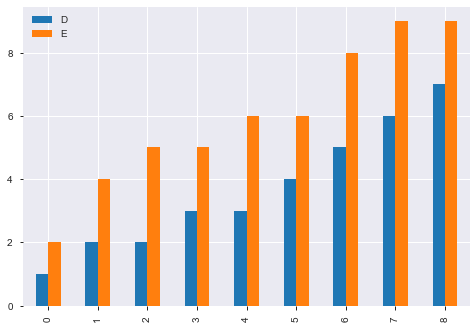

In [270]:
df.plot.bar()

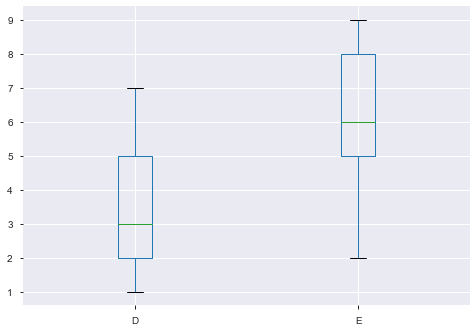

In [272]:
df.boxplot(column=['D','E'])


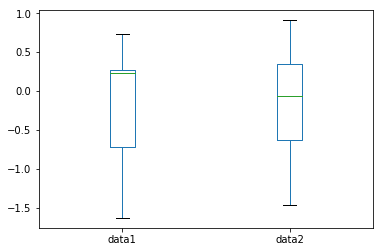

In [99]:
df.plot.box()

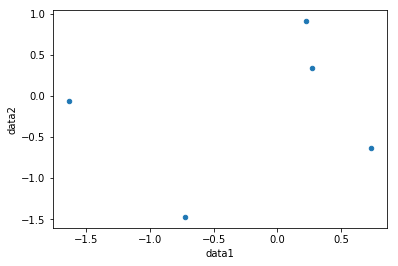

In [95]:
df.plot.scatter(x='data1',y='data2')

In [102]:
df=pd.DataFrame({'a':[1,2,2,4,7,6,8]})

In [103]:
df

,a
0,1
1,2
2,2
3,4
4,7
5,6
6,8


In [108]:
df=pd.DataFrame([1,2,2,4,7,6,8],columns=['a'])

In [109]:
df

,a
0,1
1,2
2,2
3,4
4,7
5,6
6,8


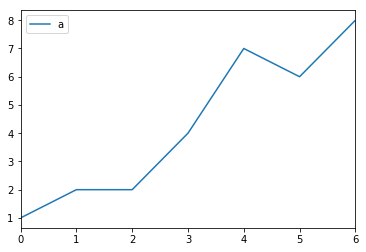

In [110]:
df.plot()

In [119]:
df = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria','India','Bangla','India'],
                    'Rank':[121,40,100,130,11,50,40,40]})
print(df.mean())
print("***********")
print(df.median())
print("***********")
print(df.mode())
print("#########")
print(df['Rank'].mean())
print("#########")
print(df['Rank'].median())
print("##########")
print(df['Country'].mode())
print("##########")
print(df['Rank'].mode())
print("____________________________")
print(df.std())
print("************")
print(df.skew())

Rank    66.5
dtype: float64
***********
Rank    45.0
dtype: float64
***********
  Country  Rank
0   India    40
#########
66.5
#########
45.0
##########
0    India
dtype: object
##########
0    40
dtype: int64
____________________________
Rank    44.051917
dtype: float64
************
Rank    0.499658
dtype: float64


In [136]:
df = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria','India','Bangla','India'],
                    'Rank':[121,40,100,130,11,50,40,40]})
df

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11
5,India,50
6,Bangla,40
7,India,40


In [133]:
df=pd.get_dummies(df,columns=['Country'],drop_first=True)

In [134]:
df

,Rank,Country_Chile,Country_Colombia,Country_Equador,Country_India,Country_Nigeria,Country_Russia
0,121,0,0,0,0,0,1
1,40,0,1,0,0,0,0
2,100,1,0,0,0,0,0
3,130,0,0,1,0,0,0
4,11,0,0,0,0,1,0
5,50,0,0,0,1,0,0
6,40,0,0,0,0,0,0
7,40,0,0,0,1,0,0


In [273]:
import pandas as pd
df1=pd.DataFrame({'a':[1,2,3,4,5,6],'b':[11,12,13,14,15,16]})
df2 = pd.DataFrame({'Country': ['Russia','Colombia','Chile','Equador','Nigeria','India','Bangla','India'],
                    'Rank':[121,40,100,130,11,50,40,40]})

In [274]:
df1

,a,b
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16


In [275]:
df2

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Equador,130
4,Nigeria,11
5,India,50
6,Bangla,40
7,India,40


In [276]:
full=[df1,df2]

In [277]:
full

[   a   b
 0  1  11
 1  2  12
 2  3  13
 3  4  14
 4  5  15
 5  6  16,     Country  Rank
 0    Russia   121
 1  Colombia    40
 2     Chile   100
 3   Equador   130
 4   Nigeria    11
 5     India    50
 6    Bangla    40
 7     India    40]

In [278]:
full[0]

,a,b
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16


In [279]:
df2["Country"].apply(lambda x: 'Bharath' if x == 'India' else 'Other')

0      Other
1      Other
2      Other
3      Other
4      Other
5    Bharath
6      Other
7    Bharath
Name: Country, dtype: object

In [23]:
df2.loc[df2['Country'] == 'India','Rank']

5    50
7    40
Name: Rank, dtype: int64

In [17]:
import pandas as pd
data={'a':[0.32,1.34,0.34],'b':[4,5,6],'c':['s','v','b']}
df=pd.DataFrame(data)
df['a'].astype(int)
df

,a,b,c
0,0.32,4,s
1,1.34,5,v
2,0.34,6,b


In [18]:
df['a']=df['a'].astype(int)
df

,a,b,c
0,0,4,s
1,1,5,v
2,0,6,b


In [27]:
df=df.drop('b',axis=1)

In [28]:
df

,a,c
0,0.32,s
1,1.34,v
2,0.34,b


In [31]:
df.corr()

,a,b
a,1.000000,0.017146
b,0.017146,1.000000


In [27]:
type(Y_train)

pandas.core.series.Series

In [25]:
train=pd.concat(X_train,Y_train)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [25]:
df=pd.DataFrame({'A':['1','2','3','4'],'B':[1,2,3,4]})


In [26]:
df

,A,B
0,1,1
1,2,2
2,3,3
3,4,4


In [27]:
df.dtypes

A    object
B     int64
dtype: object

In [23]:
df.astype('float')

,A,B
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0


In [51]:
df.iloc[0,0] = '1.2'

In [52]:
df['A'].str.isnumeric()

0    False
1     True
2     True
3     True
Name: A, dtype: bool

In [49]:
type(df['A'][1])

str

In [47]:
df['A'].str.isspace()

0      NaN
1    False
2    False
3    False
Name: A, dtype: object

In [ ]:
df.applymap(type)
pd.to_numeric(col_nm,errors='coerce')

In [54]:
df=pd.DataFrame({'a':[1,2,3,3,3,4,4,5,6,7,8,9]})

In [56]:
df['a'].quantile(0.75)

6.25

In [59]:
df = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() > 3).all(axis=1)]

,A,B,C


In [65]:
df.apply(lambda x: x)

,A,B,C
0,0.408518,1.889561,-0.133490
1,-1.254827,-1.002479,-0.231540
2,-1.292450,0.175452,-1.523214
3,0.880761,2.023922,1.084227
4,-0.601373,0.080964,1.563353
5,-0.313365,-3.077754,1.048436
6,0.313683,1.879732,-0.419375
7,0.270479,0.921837,0.025076
8,-0.721368,1.308095,0.498965
9,-0.464121,0.148493,-1.045800


In [108]:
df=pd.DataFrame({'a':[1,2,3,3,3,4,4,5,6,7,8,9]})
df['b'] = np.where(df['a'] < 2, df['a'] * 10, np.where(df['a'] < 4, df['a'] ** 2, df['a'] + 10))

In [109]:
df.loc[df['b'] == 14 , 'b']=np.nan

In [112]:
df

,a,b
0,1,10.0
1,2,4.0
2,3,9.0
3,3,9.0
4,3,9.0
5,4,NaN
6,4,NaN
7,5,15.0
8,6,16.0
9,7,17.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
a    12 non-null int64
b    10 non-null float64
dtypes: float64(1), int64(1)
memory usage: 272.0 bytes


In [114]:
#df['b'].loc[np.where((df['b'] < 10) | (df['b'] > 17))]
#df['b'].loc[np.where((df['b'] > 9))]
np.where((df['b'] == 19))

(array([11], dtype=int64),)

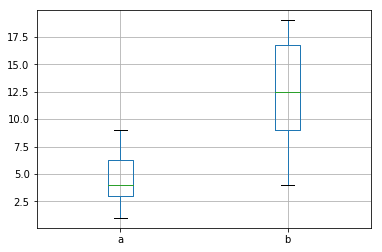

In [104]:
df.boxplot()

In [105]:
df['b'].mean()

12.6

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_mod = pd.read_csv('D://Python Scripts//iris.csv')

 
#without regression
#pd.plotting.scatter_matrix(df, alpha = 0.5, figsize = (14,8), diagonal = 'kde');


In [13]:
from IPython.display import display

In [16]:
#There many outliers in 'Insulin','BloodPressure','DiabetesPedigreeFunction'. let me impute outliers with median.
columns=list(df_mod)
for col_nm in columns[:-1]:
    L=df_mod[col_nm].quantile(0.25)-(1.5*(df_mod[col_nm].quantile(0.75)-df_mod[col_nm].quantile(0.25)))
    U=df_mod[col_nm].quantile(0.75)+(1.5*(df_mod[col_nm].quantile(0.75)-df_mod[col_nm].quantile(0.25)))
    print(df_mod[col_nm].loc[np.where((df_mod[col_nm]< L) | (df_mod[col_nm] > U))])  #outliers in each feature
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #df_mod.loc[(df_mod[col_nm]< L) | (df_mod[col_nm] > U),col_nm] = df_mod[col_nm].median()

Series([], Name: 5.1, dtype: float64)

None


14    4.4
31    4.1
32    4.2
59    2.0
Name: 3.5, dtype: float64

None


Series([], Name: 1.4, dtype: float64)

None


Series([], Name: 0.2, dtype: float64)

None


# TIME SERIES

In [1]:
import pandas as pd

In [ ]:
'''resample,rolling,shift'''

In [280]:
index = pd.date_range('1/1/2000', periods=9, freq='T')

In [281]:
index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00'],
              dtype='datetime64[ns]', freq='T')

In [6]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [282]:
df = pd.DataFrame({'Col1': [10, 20, 15, 30, 45],
                    'Col2': [13, 23, 18, 33, 48],
                   'Col3': [17, 27, 22, 37, 52]})

In [6]:
df

,Col1,Col2,Col3
0,10,13,17
1,20,23,27
2,15,18,22
3,30,33,37
4,45,48,52


In [283]:
df[:3]['Col2']

0    13
1    23
2    18
Name: Col2, dtype: int64

In [4]:
df.shift(periods=3)

,Col1,Col2,Col3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,10.0,13.0,17.0
4,20.0,23.0,27.0


In [284]:
df.shift(3, fill_value=0)

,Col1,Col2,Col3
0,0,0,0
1,0,0,0
2,0,0,0
3,10,13,17
4,20,23,27
